In [1]:
import numpy as np
import scipy.io

In [2]:
f = open(r"scrambled_lena.mat")

In [3]:
for i in range(5):
    f.readline()
m = []

In [4]:
line = f.readline()
while line[1:]!='':
    val = int(line[1:])
    m.append(val)
    line = f.readline()

In [5]:
x = np.array(m)
mat = x.reshape(512,512)
mat=mat.T

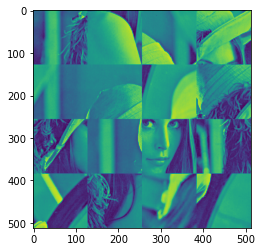

In [6]:
import matplotlib.pyplot as plt

plt.imshow(mat)

In [7]:
class Energy:
    def __init__(self, image):
        self.image = image
        self.height = 4
        self.width = 4

    def getLeftRightEnergy(self, tile):
        try:
            i, j = tile
            x1 = 128 * i
            x2 = 128 * (i + 1)
            y = 128 * (j + 1) - 1
            diff = self.image[x1:x2,y] - self.image[x1:x2,y + 1]
            return np.sqrt((diff**2).mean())
        except IndexError:
            return 0

    def getUpDownEnergy(self, tile):
        try:
            i, j = tile
            y1 = 128 * j
            y2 = 128 * (j + 1)
            x = 128 * (i + 1) - 1
            diff = self.image[x, y1:y2] - self.image[x + 1, y1:y2]
            return np.sqrt((diff**2).mean())
        except IndexError:
            return 0

    def getEnergyAround(self, tile):
        i, j = tile
        e = np.zeros(4)
        e[0] = self.getLeftRightEnergy((i,j-1))
        e[1] = self.getLeftRightEnergy((i,j))
        e[2] = self.getUpDownEnergy((i-1,j))
        e[3] = self.getUpDownEnergy((i,j))
        return e.sum()

    def getEnergyAround2Tiles(self, t1, t2):
        return self.getEnergyAround(t1) + self.getEnergyAround(t2)

    def energy(self):
        energy = 0
        for i in range(1, self.height - 1):
            for j in range(1, self.width - 1):
                energy += self.getEnergyAround((i, j))
        return energy

    def cheatEnergy(self):                             # for testing purposes only, not used in the algorithm obviously
        return np.linalg.norm(self.image - original)

In [8]:
e = Energy(mat)
e.energy()

1035.15508413872

Iteration no - 1
Best Cost - 1042.7835724729218


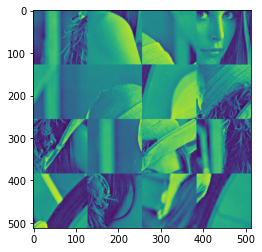

Iteration no - 20000
Best Cost - 349.59534639395355


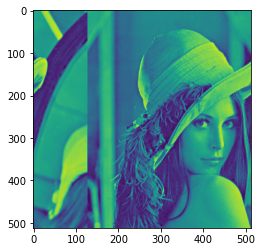

Iteration no - 40000
Best Cost - 349.59534639395355


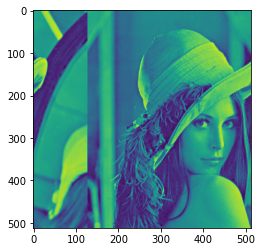

Iteration no - 60000
Best Cost - 349.59534639395355


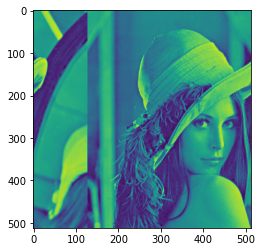

In [9]:
max_iter = 60000
temp = 1000
stop_temp = 0.00005
decay = 0.9995
x = np.arange(0,4)
y = np.arange(0,4)
curr_iter = 0
e = Energy(image = mat)
best_cost = e.energy()
best = mat
cost_list = []

while curr_iter!=max_iter and temp>=0:
    
    new = best.copy()
    np.random.shuffle(x)
    np.random.shuffle(y)
    
    cost_old = Energy(image=new).getEnergyAround2Tiles((x[0], y[0]), (x[1],y[1]))
    new[128*x[0]:128*x[0]+128, 128*y[0]:128*y[0]+128] = best[128*x[1]:128*x[1]+128, 128*y[1]:128*y[1]+128]
    new[128*x[1]:128*x[1]+128, 128*y[1]:128*y[1]+128] = best[128*x[0]:128*x[0]+128, 128*y[0]:128*y[0]+128]
    
    cost_new = Energy(image=new).getEnergyAround2Tiles((x[0], y[0]), (x[1],y[1]))
    
    if cost_new < cost_old:
        best = new
        best_cost = Energy(image=new).energy()
        
    elif np.random.rand()<np.exp(-abs(cost_old-cost_new)/temp):
        best = new
        best_cost = Energy(image=new).energy()
    
    temp = temp*decay
    curr_iter+=1
    cost_list.append(best_cost)
    
    if curr_iter==1 or curr_iter%20000==0:
        print("Iteration no -",curr_iter)
        print("Best Cost -",best_cost)
        plt.imshow(best)
        plt.show()
    
    

Text(0, 0.5, 'diff_energy')

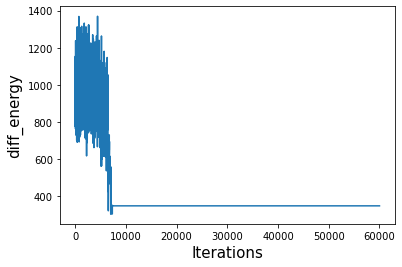

In [10]:
plt.plot(cost_list)
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('diff_energy', fontsize=15)